# The Classification of Wine Samples

### Introduction 
The question we seek to answer is, can we provide a model to predict the class of wine a sample belongs to based on the Proline and Flavonoid variables selected? 

The dataset we have selected explores different types of wine (Pinot Noir, Merlot, and Cabernet Sauvignon), as the samples of wine in the data set are grown in the same Italian region, however, used different cultivators to produce the wine.  The different cultivators allow for different classifications of wines, leading to the goal of this project which is to see if we can properly classify types of wine based on predictors.

Based on the research done by Jonathon Betchels website (https://jonathonbechtel.com/blog/2018/02/06/wines/) it’s most likely the different classes of wine: 1, 2, and 3 matches with Pinot Noir, Cabernet Sauvignon, and Merlot respectively.  These wines have different features; Merlot is a dry dark blue-colored wine grape, Cabernet Sauvignon has more of a dark fruit flavor, and lastly, Merlot is a medium-bodied wine with an accented cinnamon taste.  It’s important to properly classify the types of wines as consumers have preferences in tastes, making it imperative to create a plot to identify each wine type.  

This wine data set uses 13 different variables and aspects of wine such as alcohol content, Malic Acid, Ash, Magnesium, and color intensity to predict the types of wine. However, the flavonoid and proline variables show the strongest correlation, which is why they’ve become the focus of the project. The dataset also contains 178 different observations of wine samples grown in the same region; it is a classification problem, as we wish to classify the predicted type of wine.




### Preliminary exploratory data analysis

In [130]:
# Libraries
install.packages("GGally")
library(repr)
library(tidyverse)
library(GGally)
library(gridExtra)
options(repr.matrix.max.rows = 15)

Warning message in install.packages("GGally"):
“installation of package ‘GGally’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [120]:
# Read dataset from the web into R
wine <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", col_names = FALSE)
head(wine)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_double(),
  X13 = col_double(),
  X14 = col_double()
)



X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [121]:
# Clean and Wrangle
colnames(wine) <- c("class", "alcohol", "acid", "ash", "alcalinity", "mg", "total_phenol", 
                    "flavanoid", "non_f_phenol", "proantho", "color", "hue", "od280/od315", "proline")
wine <- wine %>%
        mutate(class = as.factor(class), mg = as.integer(mg), proline = as.integer(proline))
head(wine)

class,alcohol,acid,ash,alcalinity,mg,total_phenol,flavanoid,non_f_phenol,proantho,color,hue,od280/od315,proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


**After some exploratory data analysis, we decided to narrow down to exploring 5 variables that we have seen to have the most influence on predicting the class. The 5 variables are: alcohol, flavanoid, color, hue, proline.**

**We will choose our two main predictors after the further analysis below.**

In [132]:
# Summarize
options(digits = 4)
total_observations <- nrow(wine)
total_variables <- ncol(wine)
total_na <- sum(is.na(wine))

table1 <- data.frame(total_observations, total_variables, total_na)

obs_per_class <- wine %>%
                 group_by(class) %>%
                 summarize(count = n(),
                          percentage = n() / total_observations * 100)

wine_main <- select(wine, class, alcohol, flavanoid, color, hue, proline)
means_of_var <- wine_main %>%
                summarize(across(alcohol:proline, mean)) %>%
                pivot_longer(cols = alcohol:proline,
                             names_to = "chemical_components",
                             values_to = "mean") %>%
                arrange(mean)

`summarise()` ungrouping output (override with `.groups` argument)



In [133]:
# Number of total observations, variables, and missing values
table1

total_observations,total_variables,total_na
<int>,<int>,<int>
178,14,0


In [134]:
# Number of observations in each class
obs_per_class

class,count,percentage
<fct>,<int>,<dbl>
1,59,33.15
2,71,39.89
3,48,26.97


In [135]:
# Means of variables
means_of_var

chemical_components,mean
<chr>,<dbl>
hue,0.9574
flavanoid,2.0293
color,5.0581
alcohol,13.0006
proline,746.8933


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



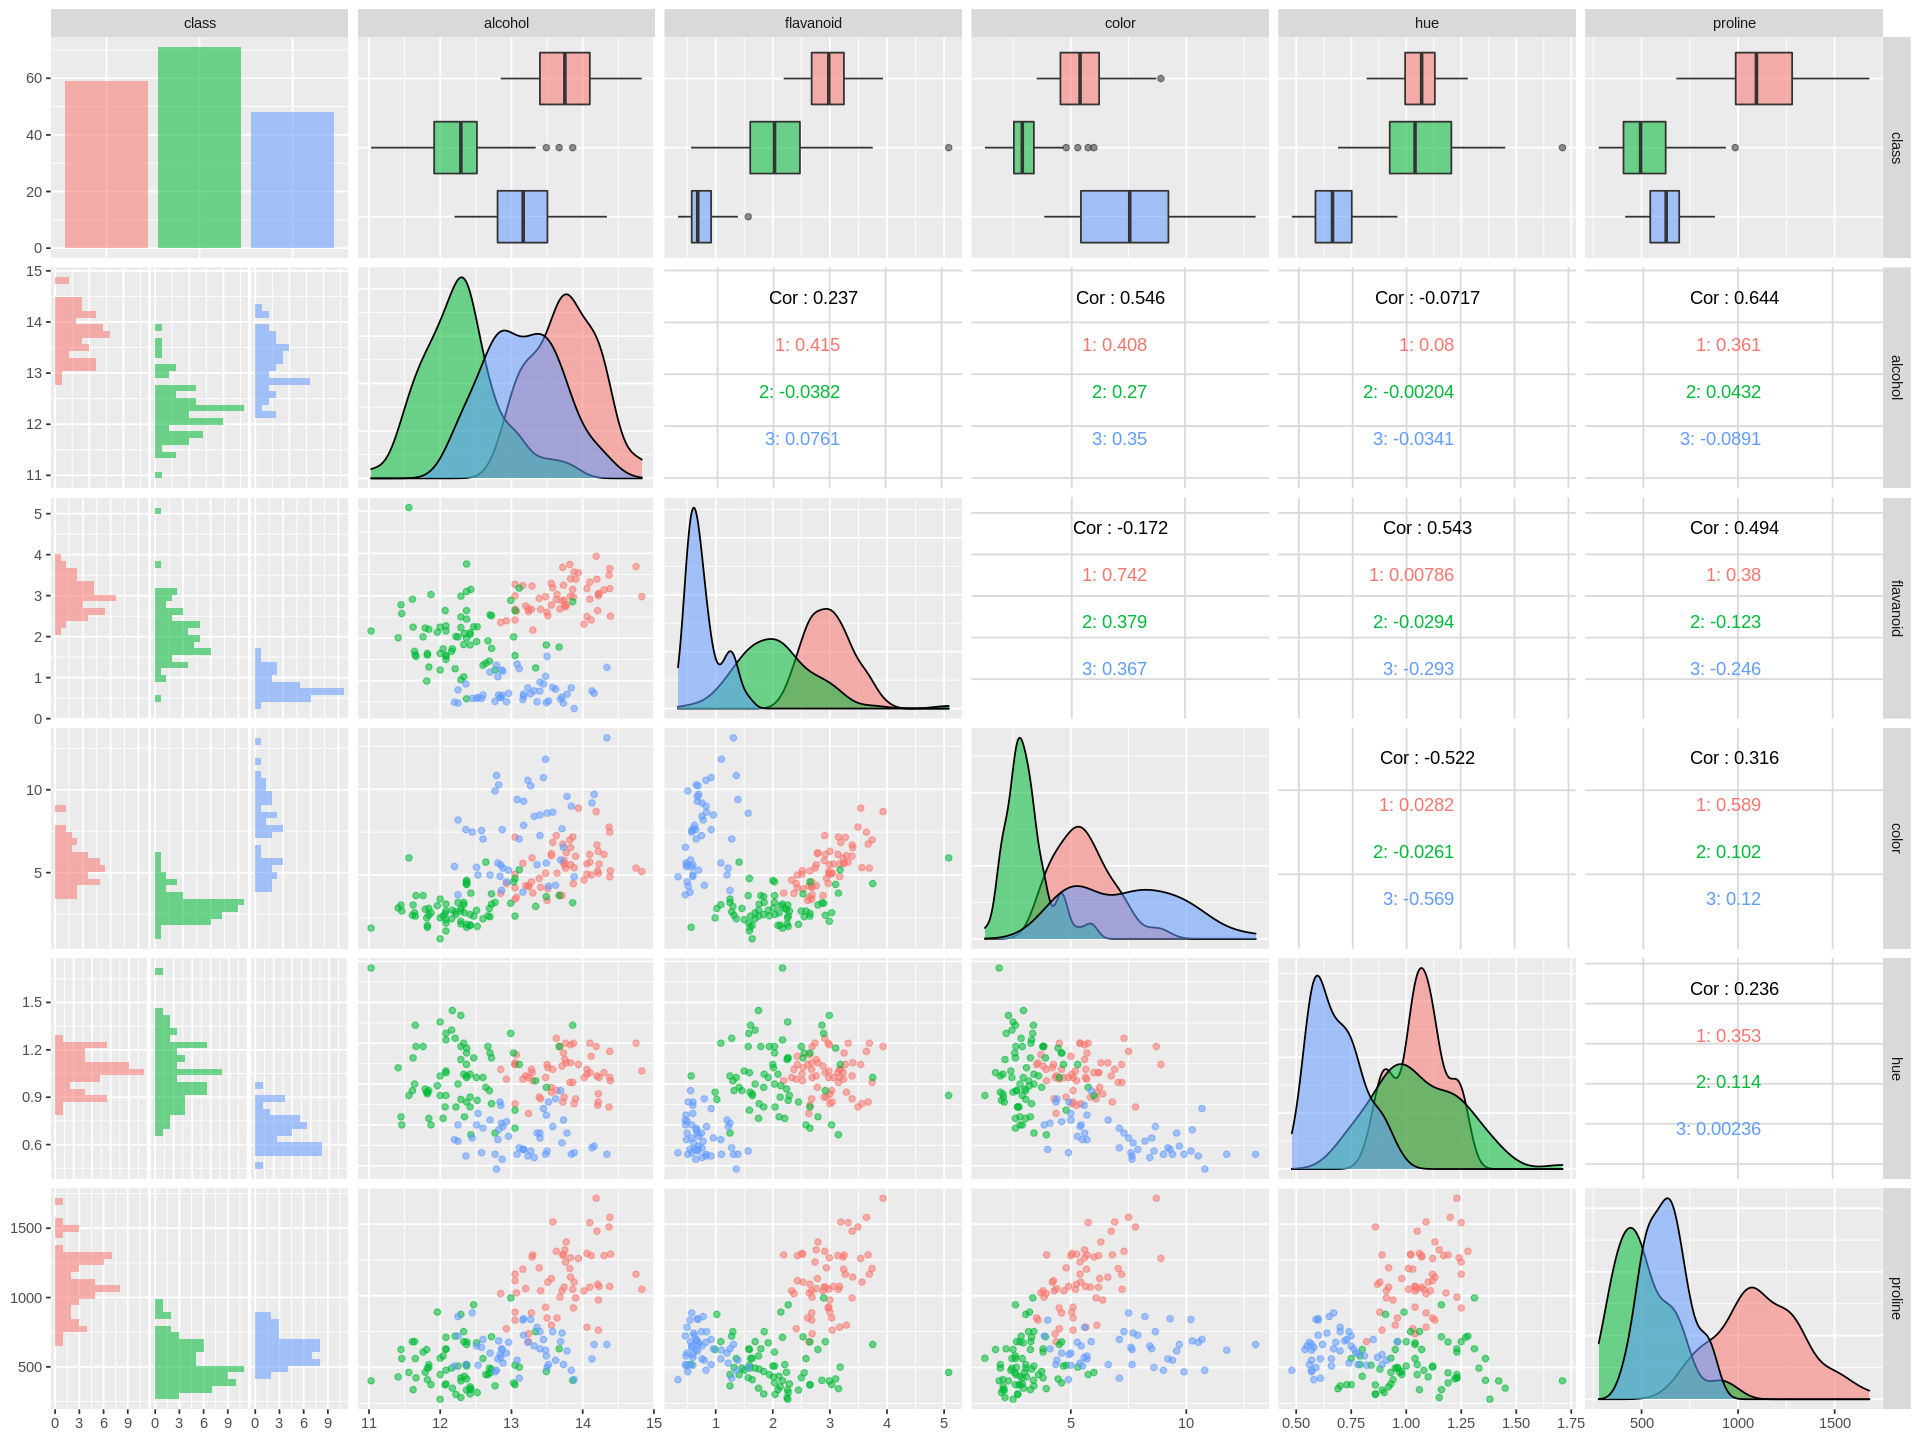

In [137]:
# Visualization
ggpairs(wine_main, aes(color = class, alpha = 0.5))

In [138]:
plot_flava_proline <- ggplot(wine, aes(x = flavanoid, y = proline, color = class)) +
                      geom_point() +
                      labs(x = "Flavanoids", y = "Proline", color = "Class") +
                      ggtitle("Flavanoids vs. Proline") +
                      theme(text = element_text(size = 20))

In [139]:
plot_hue_flava <- ggplot(wine, aes(x = hue, y = flavanoid, color = class)) +
                  geom_point() +
                  labs(x = "Hue", y = "Flavanoids", color = "Class") +
                  ggtitle("Hue vs. Flavanoids") +
                  theme(text = element_text(size = 20))

In [140]:
plot_alcohol_flava <- ggplot(wine, aes(x = alcohol, y = flavanoid, color = class)) +
                      geom_point() +
                      labs(x = "Alcohol", y = "Flavanoids", color = "Class") +
                      ggtitle("Alcohol vs. Flavanoids") +
                      theme(text = element_text(size = 20))

In [141]:
plot_hue_proline <- ggplot(wine, aes(x = hue, y = proline, color = class)) +
                    geom_point() +
                    labs(x = "Hue", y = "Proline", color = "Class") +
                    ggtitle("Hue vs. Proline") +
                    theme(text = element_text(size = 20))

In [142]:
plot_alcohol_proline <- ggplot(wine, aes(x = alcohol, y = proline, color = class)) +
                        geom_point() +
                        labs(x = "Alcohol", y = "Proline", color = "Class") +
                        ggtitle("Alcohol vs. Proline") +
                        theme(text = element_text(size = 20))

In [143]:
plot_hue_alcohol <- ggplot(wine, aes(x = hue, y = alcohol, color = class)) +
                    geom_point() +
                    labs(x = "Hue", y = "Alcohol", color = "Class") +
                    ggtitle("Hue vs. Alcohol") +
                    theme(text = element_text(size = 20))

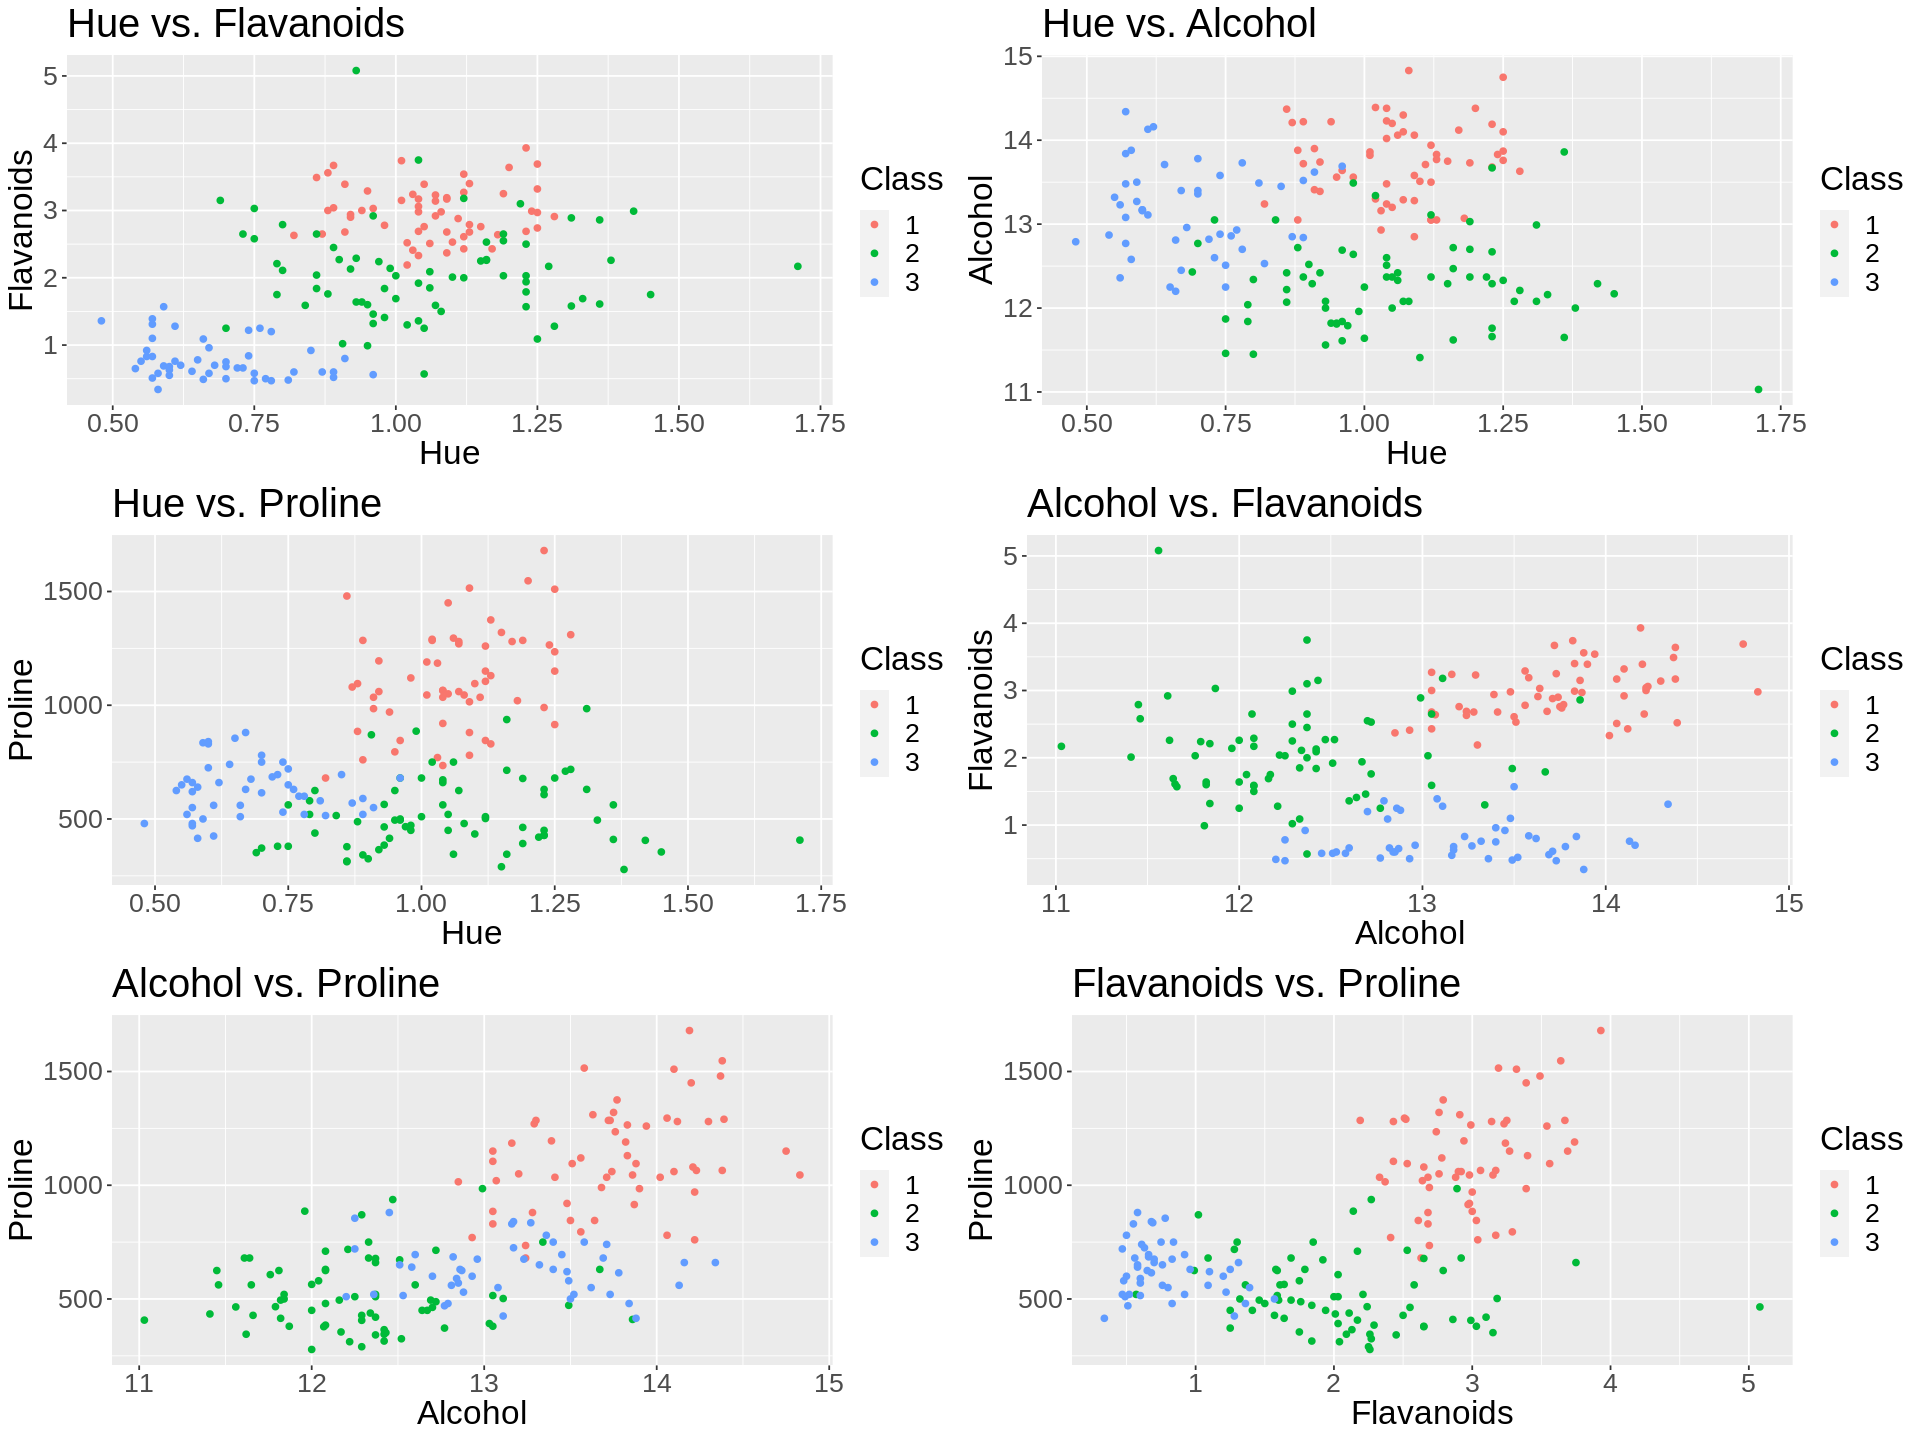

In [144]:
options(repr.plot.width = 16, repr.plot.height = 12)
grid.arrange(plot_hue_flava, plot_hue_alcohol, plot_hue_proline, plot_alcohol_flava, plot_alcohol_proline, plot_flava_proline, nrow = 3)

### Methods
Variables：proline and flava

We are using classification and library to conduct our data.

We use scatterplot to visualize the results.

### Expected outcomes and significance: 
What do you expect to find? We expect to find a correlation between the variables and wine type so that we can accurately assess the observed samples of wine with the correct type. 
 
The impact of these findings could be incredibly high, as in British Columbia alone the wine industry contributes an annual 2.8 billion dollars to the province's economy; the wine industry also covers three sectors, agriculture, manufacturing, and trade.  The scope of impact this research can have is enormously large as it spans many different sectors.  Consumers are also specific on the type of wine they wish to purchase so accurately classifying the types of wine are important to the wine industry. This form of classification looks beyond the BC area as the global wine market in 2020 produced 339.53 billion dollars, so it’s evident how large and essential the wine industry is and how this classification is important in understanding the wine types (for example white wine, red wine, and pink wine).

What future questions could this lead to?  This classification could lead to a vast possibility of questions such as; are there more than three types of classifications of wine?  Is one type of wine healthier to consume than another? Which type of wine is more sought after and more heavily consumed? It’s evident how large of an industry wine is, so it’s important to continue the classification and research of wine types and understand the impact on the global (or provincial) market. 

